**The Spark Foundation Data Science and Business Analytics Internship**

**Task 1:**Predicting student's score using Linear Regression using scikit-Learn

**Steps:**

1. Import library and data
2. Visualize the data
3. Prepare the model
4. Train the model
5. Fit the data
6. Evaluate the model
7. Predict on new data

**Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
d1 = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(d1)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**Visualization of data**

Visualization part is necessary to understand more about the data

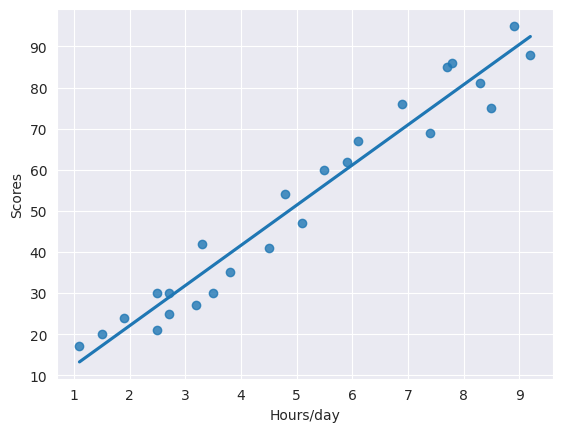

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [ ]:
sns.regplot(data=data,x='Hours',y='Scores',ci=None)
plt.xlabel('Hours/day')
plt.ylabel('Scores')
plt.show()
print(data.corr())

This graph shows that there exist a positive correlation between hours studied and the scores

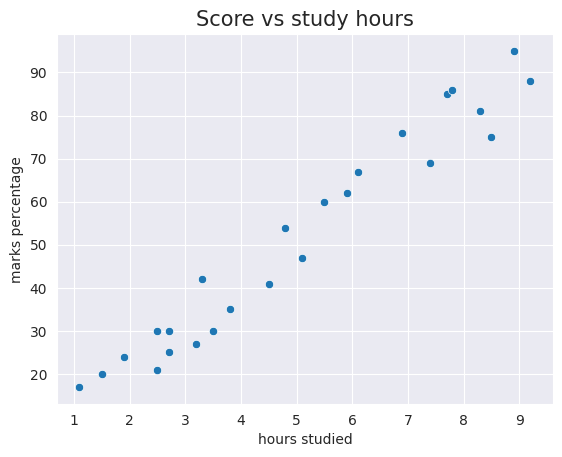

In [ ]:
sns.set_style('darkgrid')
sns.scatterplot(y=data['Scores'],x=data['Hours'])
plt.title('Score vs study hours',size=15)
plt.ylabel('marks percentage')
plt.xlabel('hours studied')
plt.show()

**Training the model**

splitting the data into features and target variables

In [ ]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

Splitting the data into train and test data

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

**Fit the data**


Fitting the data into a machine learning model

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)
print('---model trained---')

---model trained---


In [ ]:
y_pred = model.predict(x_test)

predictions = pd.DataFrame({'Hours':[i[0] for i in x_test],'Predicted scores':[s for s in y_pred]})
predictions

,Hours,Predicted scores
0,1.5,17.053665
1,3.2,33.694229
2,7.4,74.806209
3,2.5,26.842232
4,5.9,60.123359
5,3.8,39.567369
6,1.9,20.969092
7,7.8,78.721636


comparing the actual value with the predicted value

In [ ]:
comparison=pd.DataFrame({'Actual score': y_test,'Predicted score':y_pred})
comparison

,Actual score,Predicted score
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


visually comparing the actual score with the predicted score

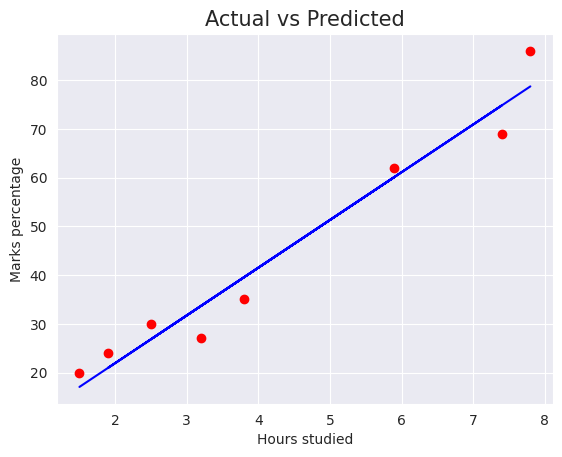

In [ ]:
plt.scatter(x=x_test,y=y_test,color='Red')
plt.plot(x_test,y_pred,color='Blue')
plt.title('Actual vs Predicted',size=15)
plt.ylabel('Marks percentage')
plt.xlabel('Hours studied')
plt.show()

**model evaluation**

In [ ]:
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.419727808027651


The model has poor performance.

**Predict on new data**

What will be the predicted score of a student studies for 9.25 hours per day?

In [ ]:
hours =[9.25]
answer = model.predict([hours])
print("Scores= {}".format(round(answer[0],3)))

Scores= 92.915


According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 92.915 marks.